学習済みモデルの利用法

PyTorch Document - [MODELS AND PRE-TRAINED WEIGHTS](https://pytorch.org/vision/stable/models.html)

In [55]:
import matplotlib.pyplot as plt 
import numpy as np

import torch
from torchvision.io import read_image
import torchvision.transforms.functional as F

from torchinfo import summary

# [Classification](https://pytorch.org/vision/stable/models.html#classification)

In [2]:
from torchvision.models import resnet50, ResNet50_Weights

In [3]:
img1 = read_image("data/sample/dog1.jpeg")     # torch.Tensorとして画像を読み込む
print(type(img1))
print(img1.size())

<class 'torch.Tensor'>
torch.Size([3, 194, 259])


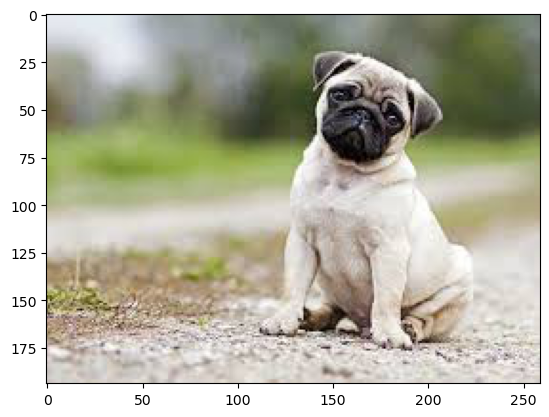

In [4]:
plt.imshow(img1.permute(1, 2, 0))      # permuteで(C,H,W)を(H,W,C)へ次元入れ替え

In [5]:
# 事前学習モデルのロード

weights1 = ResNet50_Weights.DEFAULT
print(type(weights1))

model1 = resnet50(weights=weights1) 
print(type(model1))

model1.eval()    # 推論モードを指定

<enum 'ResNet50_Weights'>
<class 'torchvision.models.resnet.ResNet'>


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
summary(model1, (10,3,194,259))     #  (B,C,H,W)のサイズのデータを投入した場合の挙動

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [10, 1000]                --
├─Conv2d: 1-1                            [10, 64, 97, 130]         9,408
├─BatchNorm2d: 1-2                       [10, 64, 97, 130]         128
├─ReLU: 1-3                              [10, 64, 97, 130]         --
├─MaxPool2d: 1-4                         [10, 64, 49, 65]          --
├─Sequential: 1-5                        [10, 256, 49, 65]         --
│    └─Bottleneck: 2-1                   [10, 256, 49, 65]         --
│    │    └─Conv2d: 3-1                  [10, 64, 49, 65]          4,096
│    │    └─BatchNorm2d: 3-2             [10, 64, 49, 65]          128
│    │    └─ReLU: 3-3                    [10, 64, 49, 65]          --
│    │    └─Conv2d: 3-4                  [10, 64, 49, 65]          36,864
│    │    └─BatchNorm2d: 3-5             [10, 64, 49, 65]          128
│    │    └─ReLU: 3-6                    [10, 64, 49, 65]          --
│ 

In [7]:
# 重みクラス（ResNet50_Weights）から、データを学習済みモデルに投入可能なインプット形式へ変換する関数を取得

print(weights1)
print(type(weights1))

preprocess1 = weights1.transforms()
print(type(preprocess1))
preprocess1

ResNet50_Weights.IMAGENET1K_V2
<enum 'ResNet50_Weights'>
<class 'torchvision.transforms._presets.ImageClassification'>


ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

[重みクラスに関して](https://pytorch.org/vision/stable/models.html#using-the-pre-trained-models)

In [8]:
# preprocessにより、リサイズやデータ型の変更を実施
# unsqueezeでバッチの次元を加える
batch1 = preprocess1(img1).unsqueeze(0)    # 学習済みモデルへのインプット

img1.size(), preprocess1(img1).size(), batch1.size()

(torch.Size([3, 194, 259]),
 torch.Size([3, 224, 224]),
 torch.Size([1, 3, 224, 224]))

In [9]:
# 学習済みモデルによる予測
prediction1 = model1(batch1).squeeze(0).softmax(0)

model1(batch1).size(),  model1(batch1).squeeze(0).size(),  prediction1.size()     # 予測結果は1000クラスの予測確率で出力

(torch.Size([1, 1000]), torch.Size([1000]), torch.Size([1000]))

In [10]:
prediction1.sum()     # 1000クラスの予測値の合計は1

tensor(1., grad_fn=<SumBackward0>)

In [11]:
prediction1.detach().numpy().min(),  prediction1.detach().numpy().max()

(0.00017638928, 0.26747885)

In [12]:
class_id1 = prediction1.argmax().item()    # 予測確率が最大のインデックスを取得
score1 = prediction1[class_id1].item()   # 予測確率
class_id1, score1

(254, 0.2674788534641266)

In [13]:
weights1.meta["categories"][class_id1]     # 予測されたカテゴリ

'pug'

In [14]:
print(weights1.meta.keys())    # weights.metaの要素

weights1.meta['categories'][:10]      # クラス名（1000カテゴリ）

dict_keys(['min_size', 'categories', 'num_params', 'recipe', '_metrics', '_docs'])


['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

[Imagenetの1000カテゴリ](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/)

***

# [Semantic Segmentation](https://pytorch.org/vision/stable/models.html#semantic-segmentation)

In [104]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.utils import draw_segmentation_masks

[fcn_resnet50](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.fcn_resnet50.html)

In [16]:
weights2 = FCN_ResNet50_Weights.DEFAULT
model2 = fcn_resnet50(weights=weights2)
model2.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [17]:
summary(model2, (10,3,194,259))     #  (B,C,H,W)のサイズのデータを投入した場合の挙動

Layer (type:depth-idx)                        Output Shape              Param #
FCN                                           [10, 21, 194, 259]        --
├─IntermediateLayerGetter: 1-1                [10, 2048, 25, 33]        --
│    └─Conv2d: 2-1                            [10, 64, 97, 130]         9,408
│    └─BatchNorm2d: 2-2                       [10, 64, 97, 130]         128
│    └─ReLU: 2-3                              [10, 64, 97, 130]         --
│    └─MaxPool2d: 2-4                         [10, 64, 49, 65]          --
│    └─Sequential: 2-5                        [10, 256, 49, 65]         --
│    │    └─Bottleneck: 3-1                   [10, 256, 49, 65]         75,008
│    │    └─Bottleneck: 3-2                   [10, 256, 49, 65]         70,400
│    │    └─Bottleneck: 3-3                   [10, 256, 49, 65]         70,400
│    └─Sequential: 2-6                        [10, 512, 25, 33]         --
│    │    └─Bottleneck: 3-4                   [10, 512, 25, 33]         379,392

In [18]:
preprocess2 = weights2.transforms()
print(type(preprocess2))
preprocess2

<class 'torchvision.transforms._presets.SemanticSegmentation'>


SemanticSegmentation(
    resize_size=[520]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [19]:
batch2 = preprocess2(img1).unsqueeze(0)

img1.size(),  preprocess2(img1).size(),  batch2.size()

(torch.Size([3, 194, 259]),
 torch.Size([3, 520, 694]),
 torch.Size([1, 3, 520, 694]))

In [20]:
prediction2 = model2(batch2)["out"]     # 21クラス（20の物体と背景）のセマンティックマスク
prediction2.size()

torch.Size([1, 21, 520, 694])

In [21]:
normalized_masks = prediction2.softmax(dim=1)    # 21のクラス方向でSoftmaxを適用。あるピクセルの21クラスへの所属確率
normalized_masks.size()

torch.Size([1, 21, 520, 694])

In [22]:
# ピクセル[0,0]の21クラスの値の合計が1
np.sum([normalized_masks[0][i][0,0].detach().numpy() for i in range(normalized_masks.size()[1])])

0.9999999

In [23]:
prediction2.min(), prediction2.max(), normalized_masks.min(), normalized_masks.max()

(tensor(-4.8831, grad_fn=<MinBackward1>),
 tensor(11.7802, grad_fn=<MaxBackward1>),
 tensor(1.3595e-07, grad_fn=<MinBackward1>),
 tensor(0.9998, grad_fn=<MaxBackward1>))

In [24]:
# 21のクラス
weights2.meta["categories"]

['__background__',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [25]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights2.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]    # dogは13番目なので、そのセマンティックマスクを取得
print(mask.size())
mask

torch.Size([520, 694])


tensor([[0.0002, 0.0002, 0.0002,  ..., 0.0006, 0.0006, 0.0006],
        [0.0002, 0.0002, 0.0002,  ..., 0.0006, 0.0006, 0.0006],
        [0.0002, 0.0002, 0.0002,  ..., 0.0006, 0.0006, 0.0006],
        ...,
        [0.0003, 0.0003, 0.0003,  ..., 0.0008, 0.0008, 0.0008],
        [0.0003, 0.0003, 0.0003,  ..., 0.0008, 0.0008, 0.0008],
        [0.0003, 0.0003, 0.0003,  ..., 0.0008, 0.0008, 0.0008]],
       grad_fn=<SelectBackward0>)

In [26]:
len(mask.flatten().detach().numpy()),  520*694

(360880, 360880)

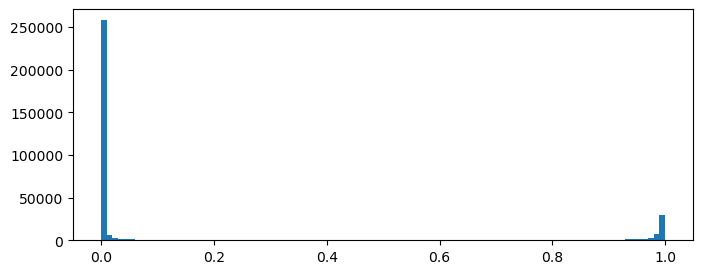

In [38]:
plt.figure(figsize=(8,3))
plt.hist(mask.flatten().detach().numpy(), bins=100)    # セマンティックマスクの値の分布
plt.show()

torch.Size([194, 259, 3])
(520, 694)


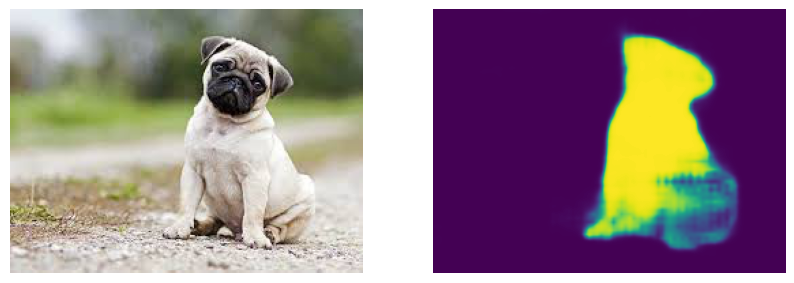

In [39]:
fig = plt.figure(figsize = (10,10))

ax_orig = fig.add_subplot(1, 2, 1)
ax_orig.axis("off")
ax_orig.imshow(img1.permute(1, 2, 0))    # オリジナル画像
print(img1.permute(1, 2, 0).shape)

ax_mask = fig.add_subplot(1, 2, 2)
ax_mask.axis("off")
ax_mask.imshow(mask.detach().numpy())     # セマンティックマスク
print(mask.detach().numpy().shape)

torch.Size([3, 520, 694]) torch.uint8
torch.Size([520, 694]) torch.bool
torch.Size([3, 520, 694]) torch.uint8


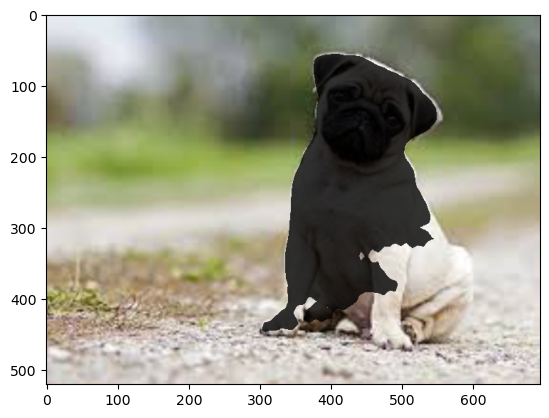

In [106]:
# 元画像とセマンティックマスクの重ね合わせ

reshaped_img = F.resize(img=img1, size=(520, 694))    # 元画像をセマンティックマスクのサイズへ変更
print(reshaped_img.size(), reshaped_img.dtype)

mask_bool = mask>0.8    # セマンティックマスクを任意の確率以上をTrue、以下をFalseとするbool型に変換
print(mask_bool.size(), mask_bool.dtype)

masked_img = draw_segmentation_masks(reshaped_img, mask_bool)     # 重ね合わせの画像に変換
print(masked_img.size(), masked_img.dtype)

plt.imshow(masked_img.permute(1, 2, 0))
plt.show()

[Visualization Utilities](https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html)  
[draw_segmentation_masks](https://pytorch.org/vision/stable/generated/torchvision.utils.draw_segmentation_masks.html)

***

# [Object Detection](https://pytorch.org/vision/stable/models.html#object-detection)

In [107]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes

In [109]:
weights3 = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model3 = fasterrcnn_resnet50_fpn_v2(weights=weights3, box_score_thresh=0.9)
model3.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

[fasterrcnn_resnet50_fpn_v2](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn_v2.html)

In [110]:
summary(model3, (10,3,194,259))     #  (B,C,H,W)のサイズのデータを投入した場合の挙動

Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         --                        --
├─GeneralizedRCNNTransform: 1-1                    --                        --
├─BackboneWithFPN: 1-2                             [10, 256, 13, 17]         --
│    └─IntermediateLayerGetter: 2-1                [10, 2048, 25, 34]        --
│    │    └─Conv2d: 3-1                            [10, 64, 400, 544]        (9,408)
│    │    └─BatchNorm2d: 3-2                       [10, 64, 400, 544]        (128)
│    │    └─ReLU: 3-3                              [10, 64, 400, 544]        --
│    │    └─MaxPool2d: 3-4                         [10, 64, 200, 272]        --
│    │    └─Sequential: 3-5                        [10, 256, 200, 272]       (215,808)
│    │    └─Sequential: 3-6                        [10, 512, 100, 136]       1,219,584
│    │    └─Sequential: 3-7                        [10, 1024, 50, 68]        7,098,368
│    │

In [112]:
preprocess3 = weights3.transforms()
print(type(preprocess3))
preprocess3

<class 'torchvision.transforms._presets.ObjectDetection'>


ObjectDetection()

In [138]:
batch3 = [preprocess3(img1)]
print(img1.size(), preprocess3(img1).size())                                # preprocess3により、サイズは変わってないが
print(img1.dtype, preprocess3(img1).dtype)                                # dtypeはfloatに変更され
print(preprocess3(img1).flatten().detach().numpy().min(),       # 0-1の値に正規化されている
      preprocess3(img1).flatten().detach().numpy().max())
batch3

torch.Size([3, 194, 259]) torch.Size([3, 194, 259])
torch.uint8 torch.float32
0.0 1.0


[tensor([[[0.9098, 0.9098, 0.9098,  ..., 0.4510, 0.4510, 0.4510],
          [0.9098, 0.9098, 0.9098,  ..., 0.4549, 0.4549, 0.4549],
          [0.9059, 0.9059, 0.9059,  ..., 0.4588, 0.4588, 0.4588],
          ...,
          [0.8157, 0.8196, 0.8314,  ..., 0.8314, 0.8353, 0.8392],
          [0.7961, 0.8000, 0.8078,  ..., 0.8549, 0.8275, 0.8039],
          [0.7961, 0.8000, 0.8078,  ..., 0.8510, 0.8275, 0.8039]],
 
         [[0.9216, 0.9216, 0.9216,  ..., 0.4863, 0.4863, 0.4863],
          [0.9216, 0.9216, 0.9216,  ..., 0.4902, 0.4902, 0.4902],
          [0.9176, 0.9176, 0.9176,  ..., 0.4941, 0.4941, 0.4941],
          ...,
          [0.7961, 0.8039, 0.8157,  ..., 0.8039, 0.8078, 0.8118],
          [0.7647, 0.7686, 0.7765,  ..., 0.8353, 0.8078, 0.7843],
          [0.7647, 0.7686, 0.7765,  ..., 0.8314, 0.8078, 0.7843]],
 
         [[0.9490, 0.9490, 0.9490,  ..., 0.4667, 0.4667, 0.4667],
          [0.9490, 0.9490, 0.9490,  ..., 0.4706, 0.4706, 0.4706],
          [0.9451, 0.9451, 0.9451,  ...,

In [140]:
prediction3 = model3(batch3)[0]   # バッチ内の画像ごとに結果が辞書で得られる。model3(batch3)はリスト。今回は1バッチ＝1画像なので、最初の要素（0）の辞書を取得
prediction3
# boxes : バウンディングボックス（ xmin, ymin, xmax, ymax）
# labels : 予測結果のカテゴリ
# scores : 予測確率

{'boxes': tensor([[110.6560,  17.3147, 227.3205, 174.2623]], grad_fn=<StackBackward0>),
 'labels': tensor([18]),
 'scores': tensor([0.9996], grad_fn=<IndexBackward0>)}

In [143]:
print(len(weights3.meta["categories"]))
weights3.meta["categories"][:10]

91


['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat']

In [144]:
weights3.meta["categories"][prediction3['labels']]

'dog'

In [147]:
labels = [weights3.meta["categories"][i] for i in prediction3["labels"]]
labels

['dog']

In [158]:
box = draw_bounding_boxes(img1, boxes=prediction3["boxes"],
                          labels=labels,
                          colors="red",
                          width=1, 
                          font_size=10)
print(box.size())
box

torch.Size([3, 194, 259])


tensor([[[232, 232, 232,  ..., 115, 115, 115],
         [232, 232, 232,  ..., 116, 116, 116],
         [231, 231, 231,  ..., 117, 117, 117],
         ...,
         [208, 209, 212,  ..., 212, 213, 214],
         [203, 204, 206,  ..., 218, 211, 205],
         [203, 204, 206,  ..., 217, 211, 205]],

        [[235, 235, 235,  ..., 124, 124, 124],
         [235, 235, 235,  ..., 125, 125, 125],
         [234, 234, 234,  ..., 126, 126, 126],
         ...,
         [203, 205, 208,  ..., 205, 206, 207],
         [195, 196, 198,  ..., 213, 206, 200],
         [195, 196, 198,  ..., 212, 206, 200]],

        [[242, 242, 242,  ..., 119, 119, 119],
         [242, 242, 242,  ..., 120, 120, 120],
         [241, 241, 241,  ..., 121, 121, 121],
         ...,
         [200, 202, 205,  ..., 195, 196, 197],
         [193, 194, 196,  ..., 210, 203, 197],
         [193, 194, 196,  ..., 209, 203, 197]]], dtype=torch.uint8)

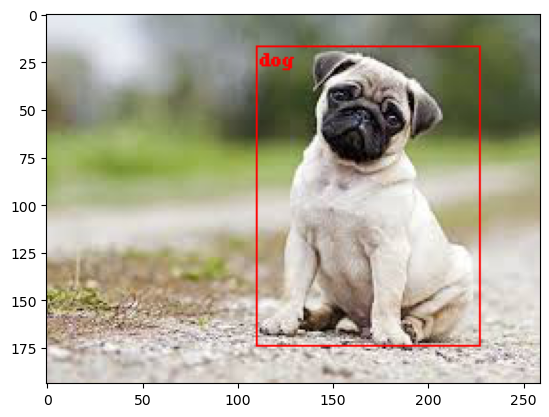

In [159]:
plt.imshow(box.permute(1, 2, 0))
plt.show()

[Visualization Utilities](https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html)  
[draw_bounding_boxes](https://pytorch.org/vision/stable/generated/torchvision.utils.draw_bounding_boxes.html)